# **Understanding Data Coursework**
#### Student: HARSHITHA MEGHARAJ
#### Student ID: 230427365
#### Programme: MSC DATA ANALYTICS

**Brief Summary**:

Our project employs machine learning techniques to enhance B-cell epitope prediction in bioinformatics. B-cell epitopes are crucial regions on antigens recognized by antibodies, playing a vital role in vaccine development and immunological research. Accurate prediction of these epitopes can significantly accelerate the design of targeted vaccines and therapeutic antibodies.

To address this, we conducted exploratory data analysis to uncover insights about feature distributions and class imbalance. Subsequently, we developed a comprehensive data preprocessing pipeline for cleaning, feature selection, and addressing mbalance. Our work underscores the importance of thorough data preparation in improving the accuracy and reliability of biological predictions.

## Exploratory Data Analysis
The section presents a thorough EDA process with effective use of graphical elements and statistical summaries to understand the dataset. The insights gained from the EDA are clearly mentioned, which will guide subsequent analysis and preprocessing steps to improve model performance and interpretability.

**Exploratory Data Analysis (EDA)** is a crucial preliminary step in data science that involves examining and summarizing data using statistical and visualization techniques. It helps uncover patterns, anomalies, and relationships within the data without making prior assumptions. EDA is essential for verifying data quality, gaining insights, and informing subsequent analysis or modeling steps in any data-driven project.[1]

In [1]:
#The following libraries are imported to facilitate data analysis, visualization, and pre-processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
#loading the data set
data = pd.read_csv("df.csv")

**Head and Tail of Data:** Displaying the first and last 2 rows to understand the structure and sample content.[1]

In [3]:
data.head(2)

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,2.840224,83,163,21,41,0,2111.31,0.2,0.266667,0.133333,...,0.000000,0.0,0.133333,0.000000,0.133333,0.066667,0.0,0.0,0.133333,Negative
1,2.923231,73,149,21,40,0,1961.08,0.4,0.533333,0.266667,...,0.133333,0.0,0.066667,0.066667,0.066667,0.266667,0.0,0.0,0.000000,Negative


In [4]:
data.tail(2)

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
7830,2.656565,70,131,19,39,0,1862.92,0.400000,0.533333,0.066667,...,0.000000,0.133333,0.266667,0.000000,0.133333,0.066667,0.0,0.0,0.133333,Negative
7831,3.323231,71,143,19,41,1,1951.05,0.333333,0.533333,0.266667,...,0.066667,0.000000,0.000000,0.066667,0.133333,0.066667,0.0,0.0,0.066667,Negative


**Overview of Data:** Provides an initial summary of the dataset.

In [5]:
#Analysing data
print("Number of Observations:", data.shape[0])#Number of Rows         
print("Number of Features:", data.shape[1])#Number of Columns
print("Variable types:", data.dtypes)

Number of Observations: 7832
Number of Features: 103
Variable types: feat_seq_entropy    float64
feat_C_atoms          int64
feat_H_atoms          int64
feat_N_atoms          int64
feat_O_atoms          int64
                     ...   
feat_Perc_T         float64
feat_Perc_V         float64
feat_Perc_W         float64
feat_Perc_Y         float64
Class                object
Length: 103, dtype: object


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7832 entries, 0 to 7831
Columns: 103 entries, feat_seq_entropy to Class
dtypes: float64(97), int64(5), object(1)
memory usage: 6.2+ MB


**Statistical Summary**

In [7]:
data.describe(include='all')

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
count,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,...,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832.000000,7832
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5288
mean,3.011067,74.084142,145.992594,20.487743,37.586568,0.600358,1944.537088,0.283563,0.504758,0.260981,...,0.047080,0.062317,0.062334,0.047302,0.073119,0.055524,0.060717,0.010972,0.031163,NaN
std,0.423369,8.518592,12.760805,3.365961,3.103610,0.909738,137.624202,0.148886,0.167106,0.134095,...,0.062237,0.084435,0.110469,0.065798,0.078119,0.065270,0.065445,0.028616,0.050265,NaN
min,0.353359,41.000000,91.000000,15.000000,30.000000,0.000000,1351.360000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.866248,69.000000,138.000000,18.000000,35.000000,0.000000,1862.890000,0.200000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.106891,74.000000,147.000000,20.000000,38.000000,0.000000,1953.920000,0.266667,0.533333,0.266667,...,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.000000,NaN
75%,3.323231,80.000000,155.000000,22.000000,40.000000,1.000000,2038.400000,0.400000,0.600000,0.333333,...,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.000000,0.066667,NaN


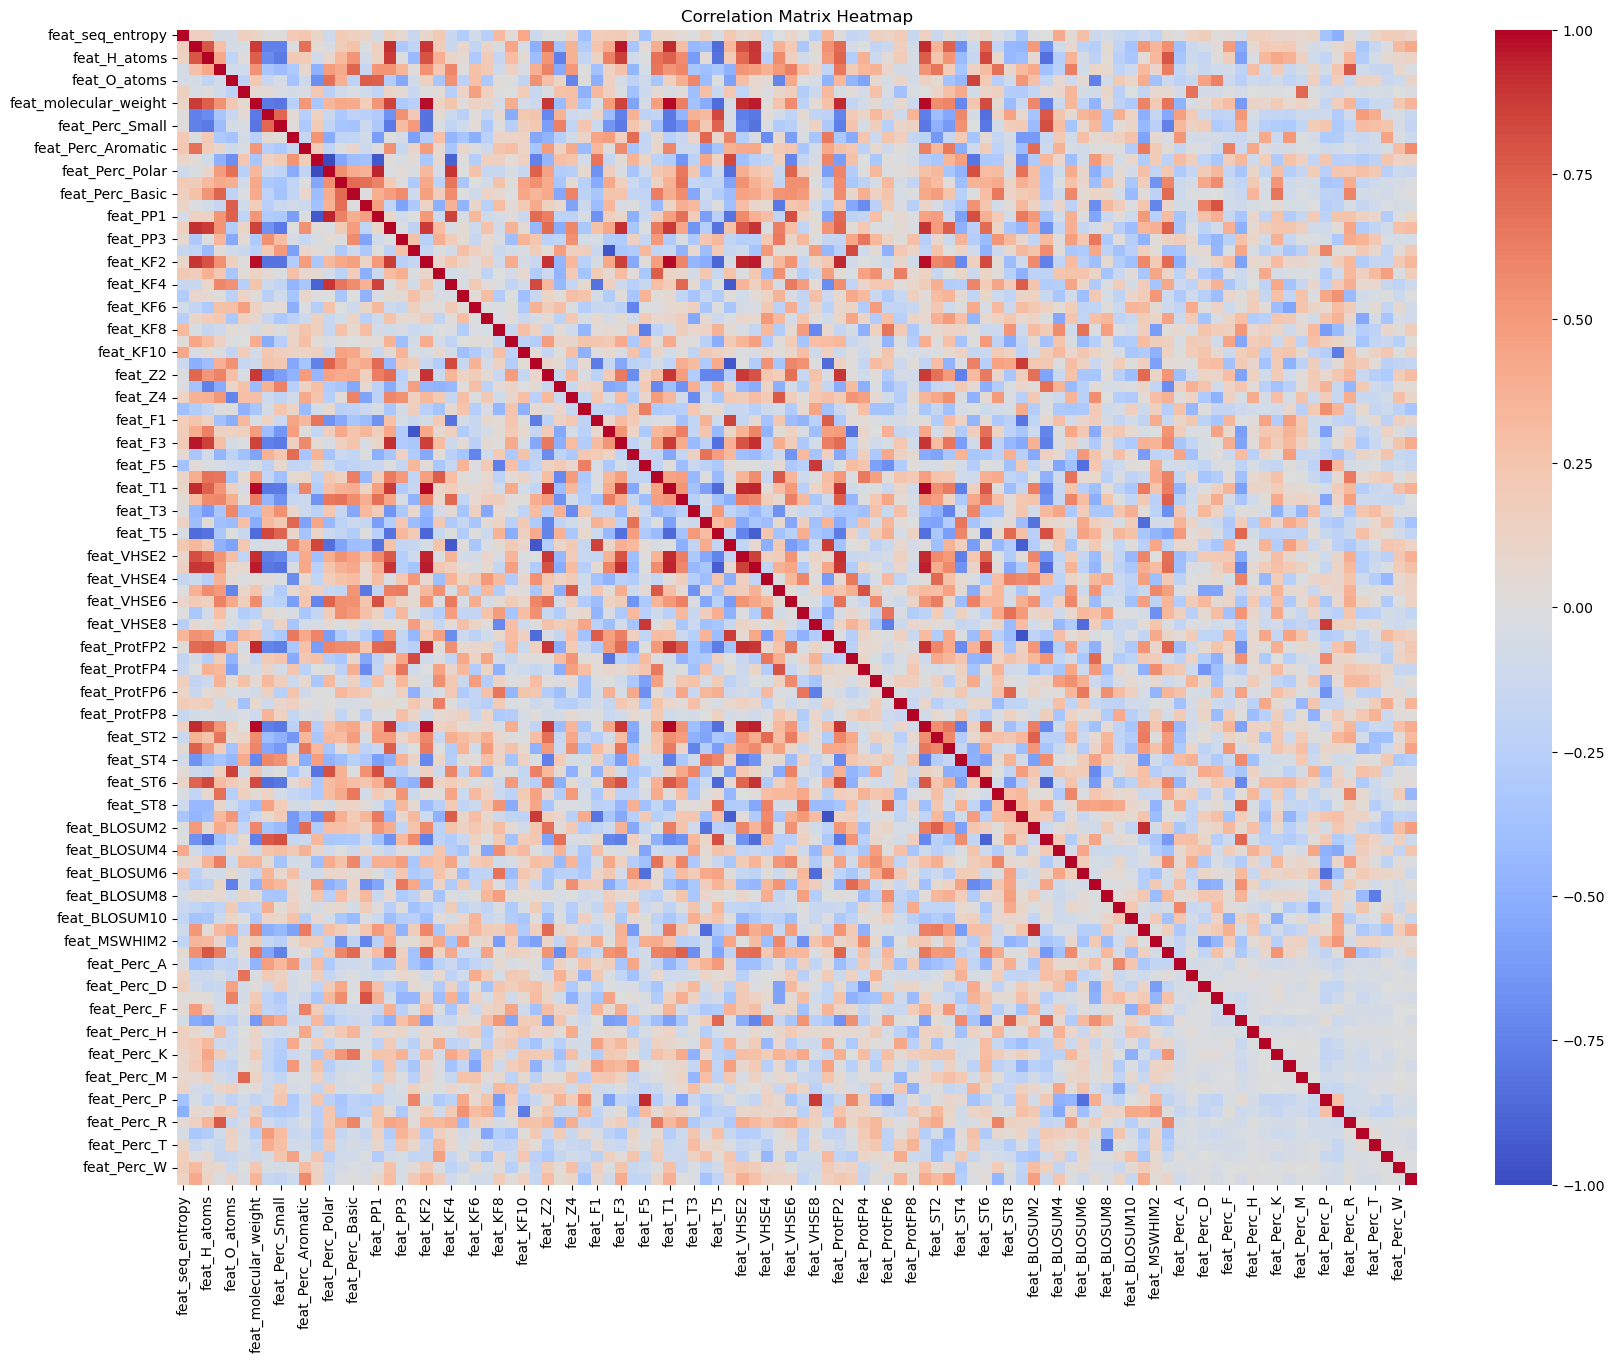

In [8]:
# Ensure to exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix for numeric features only
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


The correlation matrix heatmap visualizes the pairwise correlation coefficients between features in the dataset, where color intensity indicates the strength and direction of the correlations, with red representing positive correlations and blue representing negative correlations.[2]

In [9]:
# Interpretation of high/low correlations
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1]  # Exclude self-correlations

print("Top 10 pairs of features with the highest positive correlations:")
print(high_corr_pairs[high_corr_pairs > 0].head(10))

print("\nTop 10 pairs of features with the highest negative correlations:")
print(high_corr_pairs[high_corr_pairs < 0].head(10))

Top 10 pairs of features with the highest positive correlations:
feat_ST1               feat_T1                  0.995732
feat_T1                feat_ST1                 0.995732
feat_ST1               feat_molecular_weight    0.986113
feat_molecular_weight  feat_ST1                 0.986113
                       feat_T1                  0.985093
feat_T1                feat_molecular_weight    0.985093
                       feat_KF2                 0.984995
feat_KF2               feat_T1                  0.984995
                       feat_molecular_weight    0.983378
feat_molecular_weight  feat_KF2                 0.983378
dtype: float64

Top 10 pairs of features with the highest negative correlations:
feat_ProtFP7  feat_MSWHIM2   -0.000250
feat_MSWHIM2  feat_ProtFP7   -0.000250
feat_BLOSUM8  feat_Z4        -0.000287
feat_Z4       feat_BLOSUM8   -0.000287
feat_PP1      feat_KF1       -0.000312
feat_KF1      feat_PP1       -0.000312
feat_Perc_E   feat_F3        -0.000584
feat_F3    


The top 10 pairs of features with the highest positive correlations suggest strong linear relationships, indicating potential redundancy.
In contrast, the pairs with the highest negative correlationsshow very weak or no inverse relationships, indicating these features are mostly independent.




Impact of High Positive Correlations:
Features with very high positive correlations might be redundant, leading to multicollinearity issues in linear models.
These features can be considered for dimensionality reduction or feature selection to improve model performance and reduce complexity.

Impact of Low/Negative Correlations:
Features with low or negative correlations are mostly independent, which is beneficial for capturing diverse information.
Independent features contribute to model stability and robustness, reducing the risk of overfitting.

**Checking for missing values**

In [10]:
data.isnull().sum()

feat_seq_entropy    0
feat_C_atoms        0
feat_H_atoms        0
feat_N_atoms        0
feat_O_atoms        0
                   ..
feat_Perc_T         0
feat_Perc_V         0
feat_Perc_W         0
feat_Perc_Y         0
Class               0
Length: 103, dtype: int64

This result confirms that there are no missing values in any of the 103 columns.

**Feature Scaling:**

a)Maxima and Minima of Numerical Features

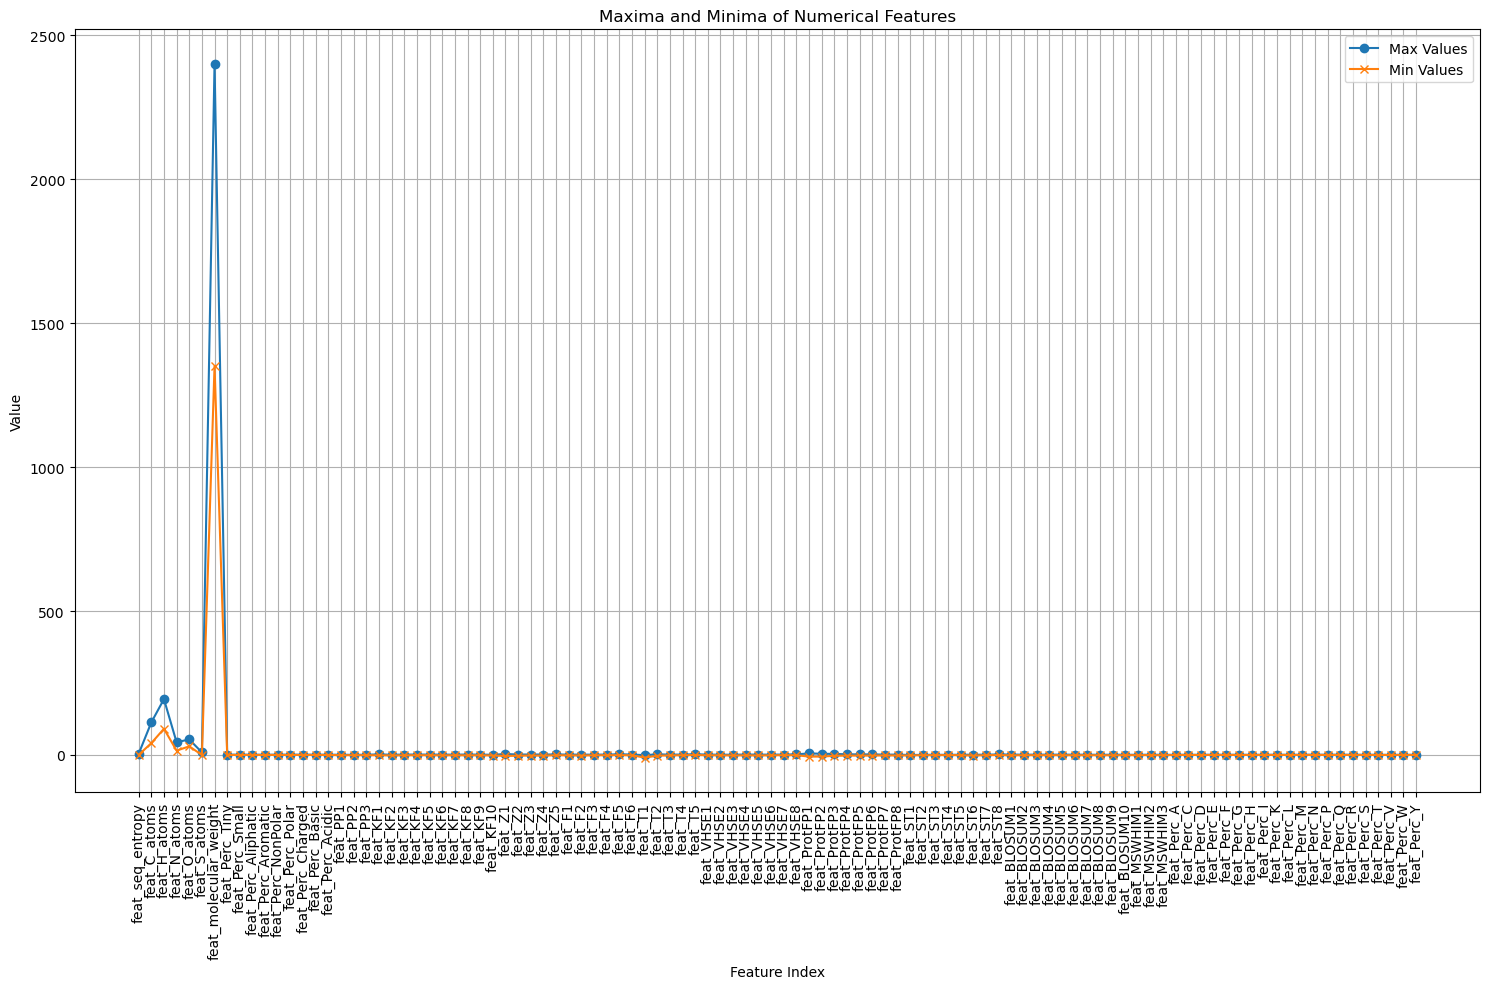

In [11]:
numeric_data = data.select_dtypes(include=[np.number])# Selecting only numeric columns

max_values = numeric_data.max()# Calculate the maxima and minima of all variables
min_values = numeric_data.min()

# Plot maxima and minima as vectors in a line chart
plt.figure(figsize=(15, 10))
plt.plot(max_values, label='Max Values', marker='o')
plt.plot(min_values, label='Min Values', marker='x')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title('Maxima and Minima of Numerical Features')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout() # This ensures that the labels fit into the figure area
plt.show()

Line chart visualizing maximum and minimum values across features, indicating the scale of features.

b) Histogram of Feature Ranges:

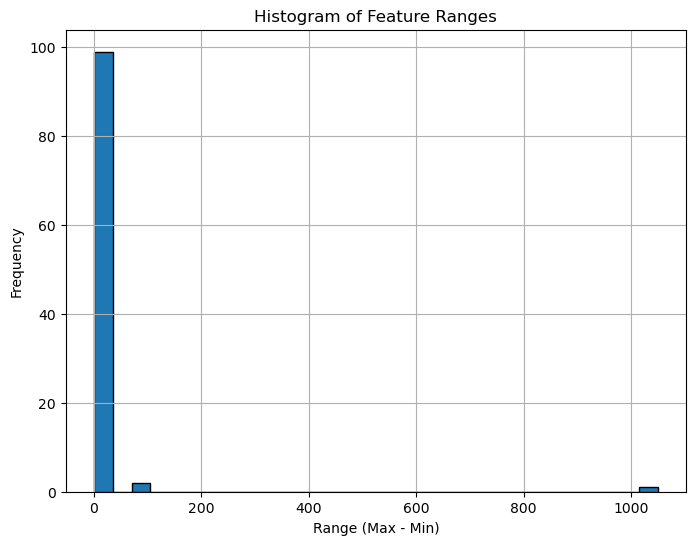

In [12]:
ranges = max_values - min_values #To calculate the ranges (max - min) of each variable
plt.figure(figsize=(8, 6))
plt.hist(ranges, bins=30, edgecolor='k')
plt.xlabel('Range (Max - Min)')
plt.ylabel('Frequency')
plt.title('Histogram of Feature Ranges')
plt.grid(True)
plt.show()

Using both calculations to check the scale of numerical features provides a comprehensive understanding of the dataset, with each method offering distinct and complementary insights. Plotting the maxima and minima vectors allows for direct comparison of the feature ranges, identifying any features with significantly different scales or extreme values. This helps in determining the need for scaling or normalization. Meanwhile, plotting a histogram of feature ranges summarizes the distribution of these ranges, highlighting features with unusually large or small scales that may need special attention. Together, these methods ensure thorough analysis, aiding in better decision-making for preprocessing steps and ultimately improving model performance and interpretability by preventing data leakage and ensuring all features contribute equally to the model

**Isolation Forest for Outlier Detection**

Isolation Forest detected 534 outliers


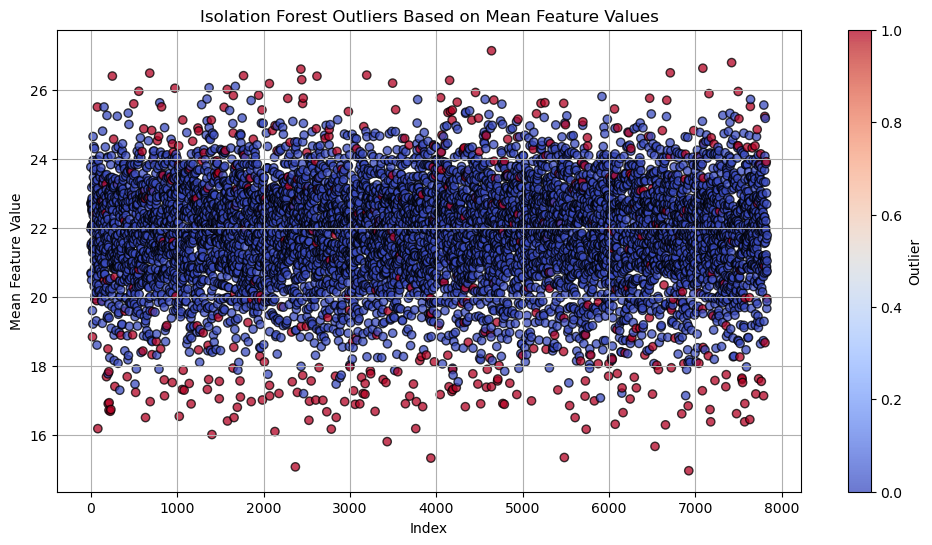

In [13]:
numeric_features = data.select_dtypes(include=[float, int]).columns# Selecting only float and int columns

iso_forest = IsolationForest(random_state=42)# Train Isolation Forest model
outliers_iso = iso_forest.fit_predict(data[numeric_features])
outliers_iso = pd.Series(outliers_iso, index=data.index)# Convert predictions (-1 indicates outliers)
outliers_iso = outliers_iso.map({1: False, -1: True})
num_outliers_iso = outliers_iso.sum()# Print the number of outliers detected
print(f"Isolation Forest detected {num_outliers_iso} outliers")
mean_values = data[numeric_features].mean(axis=1)# Visualize outliers using mean values of each row to identify overall distribution

plt.figure(figsize=(12, 6))
plt.scatter(data.index, mean_values, c=outliers_iso, cmap='coolwarm', edgecolor='k', alpha=0.75)
plt.title('Isolation Forest Outliers Based on Mean Feature Values')
plt.xlabel('Index')
plt.ylabel('Mean Feature Value')
plt.colorbar(label='Outlier')
plt.grid(True)
plt.show()

The scatter plot visualizes the outliers detected by the Isolation Forest model based on the mean feature values of each row in the dataset. The x-axis represents the index of each data point, while the y-axis shows the mean feature value for each row. Data points are color-coded to distinguish between non-outliers (blue) and outliers (red). The color bar on the right provides a gradient scale for identifying outliers, with red indicating outliers and blue indicating non-outliers. The plot effectively shows that outliers are scattered throughout the dataset, with 534 outliers detected out of 7832 samples, as indicated in the print statement above the plot.

**Class Distribution Analysis**

Class Distribution Counts:
Class
Negative    5288
Positive    2544
Name: count, dtype: int64

Class Distribution Proportions:
Class
Negative    0.675179
Positive    0.324821
Name: count, dtype: float64


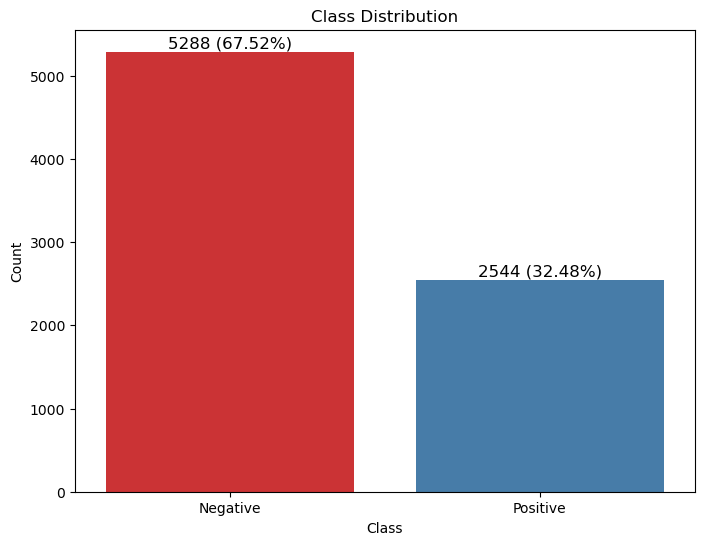

In [14]:
class_counts = data['Class'].value_counts()
class_proportions = class_counts / len(data)

# Print class distribution counts and proportions
print("Class Distribution Counts:")
print(class_counts)
print("\nClass Distribution Proportions:")
print(class_proportions)

# Plot class distribution with proportions
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
for i, count in enumerate(class_counts):
    plt.text(i, count + 50, f'{count} ({class_proportions[i]:.2%})', ha='center', fontsize=12)
plt.show()


This bar chart reveals a significant class imbalance, with the Negative class comprising 67.52% (5,288 instances) and the Positive class comprising 32.48% (2,544 instances) of the data. This difference indicates a potential bias towards the negative layer, requiring action to address the imbalance in order to achieve balanced model performance..

## Data Preprocessing

This section details the steps taken for data preprocessing, including checking for missing values, removing duplicates, splitting the dataset, checking class distribution, detecting and removing outliers, and scaling the features.

**Checking for Missing Values**

In [15]:
missing_values = data.isnull().sum()# Check for missing values in each column
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage[missing_percentage > 0])

row_missing_percentage = (data.isnull().sum(axis=1) / data.shape[1]) * 100# Check if there are rows with a high percentage of missing values
high_missing_rows = row_missing_percentage[row_missing_percentage > 50]

print(f"\nNumber of rows with more than 50% missing values: {len(high_missing_rows)}")
columns_to_drop = missing_percentage[missing_percentage > 50].index#remove columns or rows with a high percentage of missing values
rows_to_drop = high_missing_rows.index

data_cleaned = data.drop(columns=columns_to_drop)# Drop these columns and rows from the dataset
data_cleaned = data_cleaned.drop(index=rows_to_drop)

print(f"\nDropped {len(columns_to_drop)} columns and {len(rows_to_drop)} rows due to a high percentage of missing values.")

Missing Values in Each Column:
Series([], dtype: int64)

Percentage of Missing Values in Each Column:
Series([], dtype: float64)

Number of rows with more than 50% missing values: 0

Dropped 0 columns and 0 rows due to a high percentage of missing values.


This above output indicates that there are no missing values ​​in the dataset. Both the number and percentage of missing values ​​in each column are zero, implying that each column is complete and there are no missing entries. Additionally, no row contains more than 50% missing values. As a result, no columns or rows were removed from the dataset due to missing values, confirming that the data is complete and does not require imputation or removal of missing data.

**Checking and Removing Duplicates**

In [16]:
duplicates = data.duplicated()
dup_rows = data[duplicates]
print("Below displayed is the dataset after removing the duplicate rows")

data = data.drop_duplicates()
data


Below displayed is the dataset after removing the duplicate rows


,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,2.840224,83,163,21,41,0,2111.31,0.200000,0.266667,0.133333,...,0.000000,0.000000,0.133333,0.000000,0.133333,0.066667,0.000000,0.000000,0.133333,Negative
1,2.923231,73,149,21,40,0,1961.08,0.400000,0.533333,0.266667,...,0.133333,0.000000,0.066667,0.066667,0.066667,0.266667,0.000000,0.000000,0.000000,Negative
2,3.106891,81,150,20,39,0,2028.18,0.133333,0.266667,0.200000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Positive
3,2.840224,66,130,18,35,4,1864.09,0.533333,0.800000,0.200000,...,0.133333,0.133333,0.000000,0.000000,0.133333,0.066667,0.000000,0.066667,0.000000,Negative
4,3.373557,74,144,22,34,1,1918.13,0.266667,0.533333,0.400000,...,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.133333,0.000000,0.066667,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,2.472906,67,130,18,36,0,1763.83,0.533333,0.800000,0.533333,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.000000,0.000000,Negative
7827,2.815922,57,125,17,37,5,1801.03,0.666667,0.866667,0.066667,...,0.066667,0.066667,0.000000,0.000000,0.066667,0.200000,0.000000,0.000000,0.000000,Positive
7828,3.139572,67,130,16,37,1,1783.89,0.600000,0.666667,0.266667,...,0.000000,0.066667,0.066667,0.000000,0.200000,0.133333,0.000000,0.000000,0.066667,Negative
7829,3.106891,73,136,18,37,1,1890.03,0.200000,0.733333,0.133333,...,0.066667,0.266667,0.000000,0.000000,0.000000,0.133333,0.066667,0.000000,0.000000,Negative


540 duplicates were detected and removed.The dataset now contains 7292 rows.

**Data Splitting**

In [17]:
features = data.loc[:, data.columns != 'Class']  # Features
target = data['Class']  # Target variable

# Perform stratified train-test split with 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42, stratify=target)


We performed a stratified tratified train-test split, which ensures that the class distribution in the training and testing sets mirrors the original dataset(which is verified in the following step). 25% of the data was alloacted to test set.

**Verifying Class Distribution**

In [18]:
# Verify the class distribution in the splits
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

print("\nTraining set class distribution:")
print(train_distribution)

print("\nTesting set class distribution:")
print(test_distribution)



Training set class distribution:
Class
Negative    0.666484
Positive    0.333516
Name: proportion, dtype: float64

Testing set class distribution:
Class
Negative    0.666484
Positive    0.333516
Name: proportion, dtype: float64


In [19]:
# Save the testing set for final performance evaluation
X_test.to_csv('X_test_final.csv', index=False)
y_test.to_csv('y_test_final.csv', index=False)

print("\nTraining set first few rows:")
print(X_train.head())

print("\nTraining set data types and null values:")
print(X_train.info())


Training set first few rows:
      feat_seq_entropy  feat_C_atoms  feat_H_atoms  feat_N_atoms  \
5753          3.106891            74           145            19   
473           2.732915            73           137            19   
3928          3.323231            70           143            21   
1050          2.422580            62           126            24   
5159          3.006239            69           135            17   

      feat_O_atoms  feat_S_atoms  feat_molecular_weight  feat_Perc_Tiny  \
5753            43             0                1989.04        0.133333   
473             49             0                2064.96        0.066667   
3928            36             0                1855.00        0.466667   
1050            42             0                1879.80        0.200000   
5159            42             0                1874.91        0.333333   

      feat_Perc_Small  feat_Perc_Aliphatic  ...  feat_Perc_M  feat_Perc_N  \
5753         0.533333            

In [20]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in training set:")
print(X_train.describe())


Summary statistics for numerical columns in training set:
       feat_seq_entropy  feat_C_atoms  feat_H_atoms  feat_N_atoms  \
count       5469.000000   5469.000000   5469.000000   5469.000000   
mean           3.026500     74.153410    146.221064     20.512525   
std            0.405621      8.427347     12.720604      3.404685   
min            0.353359     41.000000     91.000000     15.000000   
25%            2.866248     69.000000    139.000000     18.000000   
50%            3.106891     74.000000    147.000000     20.000000   
75%            3.323231     80.000000    155.000000     22.000000   
max            3.906891    113.000000    187.000000     44.000000   

       feat_O_atoms  feat_S_atoms  feat_molecular_weight  feat_Perc_Tiny  \
count   5469.000000   5469.000000            5469.000000     5469.000000   
mean      37.540684      0.613641            1945.637886        0.282818   
std        3.091633      0.933077             135.798517        0.145517   
min       30.00

In [21]:
# Save the final evaluation set to a different variable
eval_X = X_test
eval_y = y_test

# The training set is the one you'll use to learn data transformations and train models
train_X = X_train.reset_index(drop=True)
train_y = y_train.reset_index(drop=True)

**Checking for Outliers after data splitting**

In [22]:
# Select numerical features for anomaly detection using a different method
numerical_cols = [col for col in train_X.columns if pd.api.types.is_numeric_dtype(train_X[col])]

# Initialize the Isolation Forest model with a different approach
iso_forest_model = IsolationForest(contamination='auto', random_state=42)

iso_forest_model.fit(train_X[numerical_cols])

# Predict outliers and create an anomaly flag
train_X['anomaly_score'] = iso_forest_model.decision_function(train_X[numerical_cols])
train_X['anomaly_flag'] = iso_forest_model.predict(train_X[numerical_cols])

# Anomalies are labeled as -1
detected_anomalies = train_X[train_X['anomaly_flag'] == -1]
count_anomalies = detected_anomalies.shape[0]
print("Number of outliers detected are", count_anomalies)

Number of outliers detected are 387


Isolation Forest identified anomalies in the training set, which were subsequently removed to enhance data quality.

In [23]:
# Remove the outliers from the train_X and corresponding labels in train_y
cleaned_train_X = train_X[train_X['anomaly_flag'] == 1].drop(columns=['anomaly_flag', 'anomaly_score'])
cleaned_train_y = train_y.loc[cleaned_train_X.index]

print(f"After removing outliers our data has {cleaned_train_X.shape[0]} observations")


After removing outliers our data has 5082 observations


**Feature Scaling**

In [24]:
scaler = MinMaxScaler()
scaled_cleaned_train_X = scaler.fit_transform(cleaned_train_X)
scaled_cleaned_train_X = pd.DataFrame(scaled_cleaned_train_X, columns=cleaned_train_X.columns, index=cleaned_train_X.index)

print("Scaled data (first 5 rows):")
print(scaled_cleaned_train_X.head())

print("Size of scaled_cleaned_train_X DataFrame:", scaled_cleaned_train_X.shape)


Scaled data (first 5 rows):
   feat_seq_entropy  feat_C_atoms  feat_H_atoms  feat_N_atoms  feat_O_atoms  \
0          0.701039      0.448980      0.461538      0.222222      0.684211   
2          0.781886      0.367347      0.435897      0.333333      0.315789   
3          0.445311      0.204082      0.217949      0.500000      0.631579   
4          0.663425      0.346939      0.333333      0.111111      0.631579   
5          0.663425      0.489796      0.602564      0.500000      0.526316   

   feat_S_atoms  feat_molecular_weight  feat_Perc_Tiny  feat_Perc_Small  \
0           0.0               0.574428        0.181818         0.533333   
2           0.0               0.403878        0.636364         0.666667   
3           0.0               0.435433        0.272727         0.866667   
4           0.0               0.429211        0.454545         0.533333   
5           0.0               0.647157        0.090909         0.400000   

   feat_Perc_Aliphatic  ...  feat_Perc_M  feat

Scaling was performed to normalize feature values, ensuring all features contribute equally to model training. After scaling, the size of scaled data came to be 5082 observations and 102 features.

In [25]:
train_X = train_X.drop(columns=['anomaly_score', 'anomaly_flag'])
train_X

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,...,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
0,3.106891,74,145,19,43,0,1989.04,0.133333,0.533333,0.333333,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.000000,0.133333,0.000000,0.066667
1,2.732915,73,137,19,49,0,2064.96,0.066667,0.533333,0.133333,...,0.000000,0.133333,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000,0.066667
2,3.323231,70,143,21,36,0,1855.00,0.466667,0.666667,0.400000,...,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667,0.133333,0.133333,0.066667,0.000000
3,2.422580,62,126,24,42,0,1879.80,0.200000,0.866667,0.266667,...,0.000000,0.400000,0.066667,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.000000
4,3.006239,69,135,17,42,0,1874.91,0.333333,0.533333,0.400000,...,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000,0.066667,0.133333,0.000000,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,3.189898,75,133,21,41,2,2049.11,0.266667,0.666667,0.133333,...,0.000000,0.200000,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,0.133333,0.000000
5465,3.240224,84,153,19,39,0,2053.23,0.133333,0.533333,0.333333,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.066667,0.266667,0.066667,0.066667
5466,3.373557,70,143,19,39,1,1907.05,0.400000,0.666667,0.266667,...,0.066667,0.000000,0.066667,0.000000,0.066667,0.133333,0.133333,0.133333,0.000000,0.066667
5467,3.373557,74,150,20,38,0,1928.09,0.200000,0.600000,0.333333,...,0.000000,0.066667,0.066667,0.000000,0.066667,0.133333,0.000000,0.133333,0.000000,0.066667


Columns "anomaly_score" and "anomaly_flag" were temporary addition for the outlier detection, which is removed now.Removing them maintains data integrity, prevents unintended bias, and ensures the model learns only from relevant features. 

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(scaled_cleaned_train_X)
poly_feature_names = poly.get_feature_names_out(scaled_cleaned_train_X.columns)
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=scaled_cleaned_train_X.index)

enhanced_features = pd.concat([scaled_cleaned_train_X, poly_features_df], axis=1)
print("Enhanced features shape with polynomial features:", enhanced_features.shape)

# Step 4: Clustering-Based Features
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
enhanced_features['cluster'] = kmeans.fit_predict(enhanced_features)
print("Enhanced features shape with clustering features:", enhanced_features.shape)

Enhanced features shape with polynomial features: (5082, 5355)
Enhanced features shape with clustering features: (5082, 5356)


The code was used to improve the feature set by generating polynomial features and adding cluster-based features to capture interactions and patterns not represented by the original features. It was not used later, probably because further feature reduction using SelectKBest with chi-square is preferred to select the most relevant features, thereby improving model performance by removing less important or redundant features

## Feature reduction
The SelectKBest method with the Chi-Square score function was used to select the top 10 most important features. This step reduces the dimensionality of the dataset, improving the efficiency and performance of machine learning models.

In [27]:
cleaned_train_y_np = cleaned_train_y.to_numpy().ravel()# Convert cleaned_train_y to a NumPy array
scaled_cleaned_train_X_np = scaled_cleaned_train_X.to_numpy()# Ensure scaled_cleaned_train_X is a NumPy array

# Apply SelectKBest with the chi2 score function to select the top 10 features
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(scaled_cleaned_train_X_np, cleaned_train_y_np)

top_features_idx = selector.get_support(indices=True)# Get the indices of the top 10 features

top_feature_names = scaled_cleaned_train_X.columns[top_features_idx]# Convert the column names to a NumPy array and display the names of the top 10 features
print("Top 10 selected features:", top_feature_names.tolist())


Top 10 selected features: ['feat_O_atoms', 'feat_Perc_Aromatic', 'feat_Perc_Acidic', 'feat_PP1', 'feat_VHSE1', 'feat_ProtFP1', 'feat_ST5', 'feat_BLOSUM1', 'feat_Perc_E', 'feat_Perc_Q']


Above are the Top 10 features selected by applying SelectKbest with chi2 score function

## Addressing class imbalance
SMOTE was applied to balance the class distribution in the training dataset. This ensures that the models trained on this data are not biased towards the majority class and can generalize better to the minority class.

In [28]:
smote = SMOTE(random_state=42)

X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train, y_train)# Apply SMOTE to the training data

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote_resampled).value_counts())


Class distribution before SMOTE:
Class
Negative    3645
Positive    1824
Name: count, dtype: int64

Class distribution after SMOTE:
Class
Negative    3645
Positive    3645
Name: count, dtype: int64


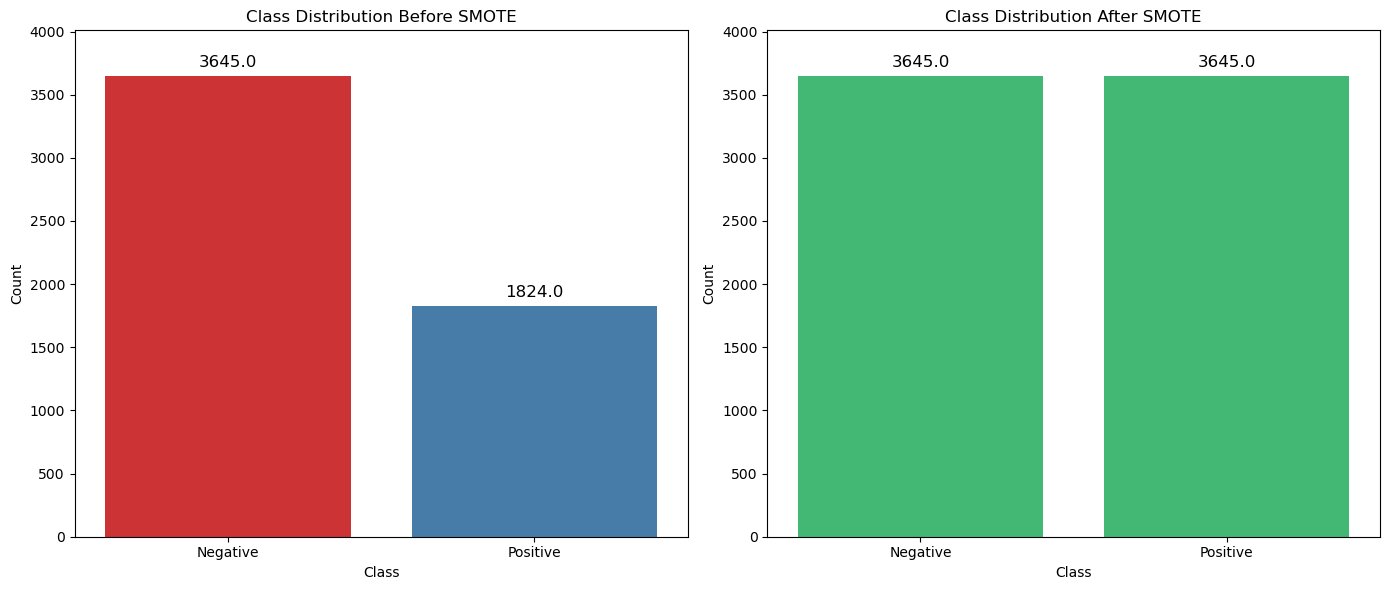

In [29]:
data_before = pd.DataFrame({'Class': y_train})# Convert to DataFrames for easy plotting
data_after = pd.DataFrame({'Class': y_smote_resampled})

plt.figure(figsize=(14, 6))# Set up the matplotlib figure
# Plot class distribution before SMOTE
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Class', data=data_before, palette='Set1')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
plt.ylim(0, max(data_before['Class'].value_counts()) * 1.1)  

# Plot class distribution after SMOTE
after_colors = ["#2ecc71", "#2ecc71"]# Define colors
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Class', data=data_after, palette=after_colors)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
plt.ylim(0, max(data_after['Class'].value_counts()) * 1.1)  # Add some space on top for annotations

plt.tight_layout()
plt.show()


These preprocessing steps are crucial for enhancing model performance and generalization. Feature reduction simplifies the model and potentially improves its interpretability, while addressing class imbalance ensures the model learns equally from both classes, leading to more robust and accurate predictions across all categories in the dataset.

Based on the observations made during these above steps, we decided to models diverse models to fit the data, which is done in predceeding steps

## Model fitting
In the model fitting phase, various machine learning algorithms were trained on the prepared dataset to identify the best-performing model based on key metrics

Logistic Regression - ROC AUC: 0.6225
Decision Tree - ROC AUC: 0.5390
Random Forest - ROC AUC: 0.6295
SVM - ROC AUC: 0.6178
KNN - ROC AUC: 0.6024
Naive Bayes - ROC AUC: 0.6234


C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - ROC AUC: 0.6022


C:\Users\Harshitha Megharaj\AN\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - ROC AUC: 0.6073


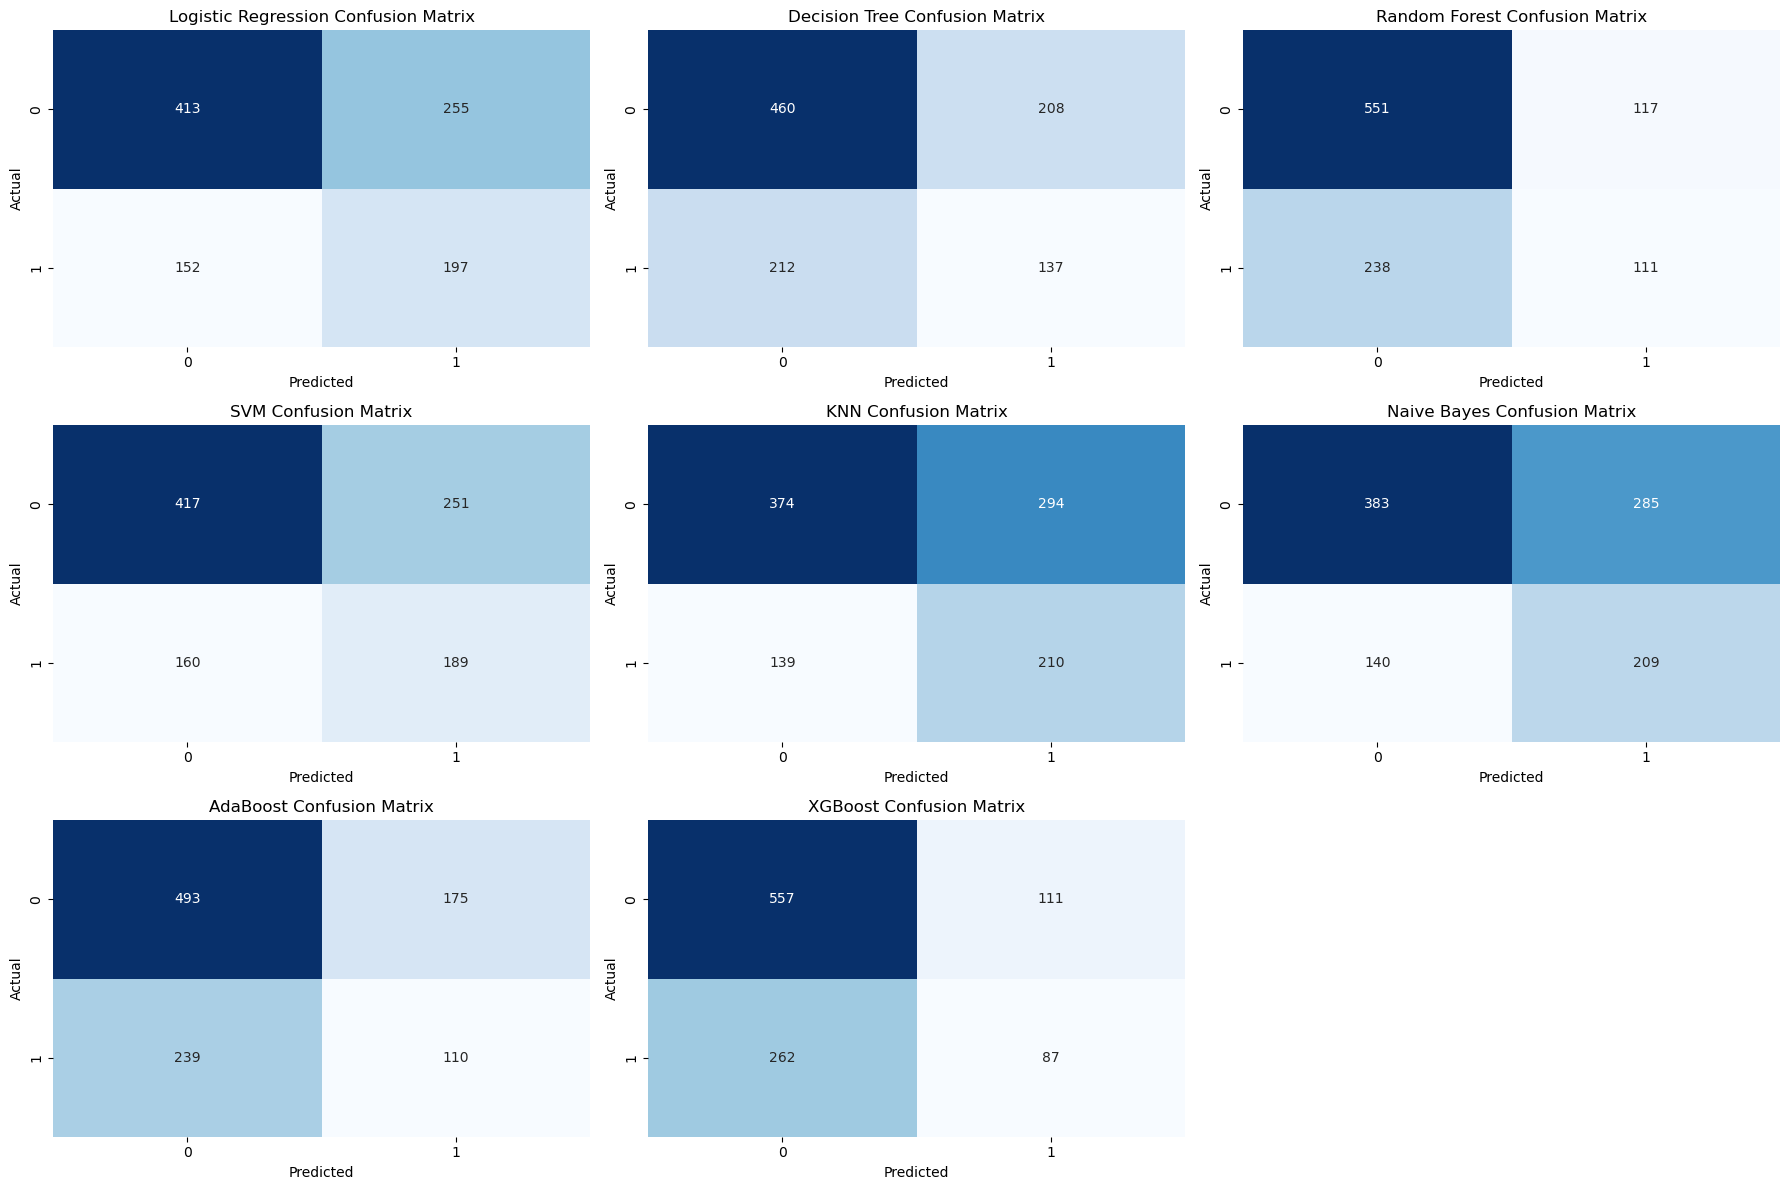

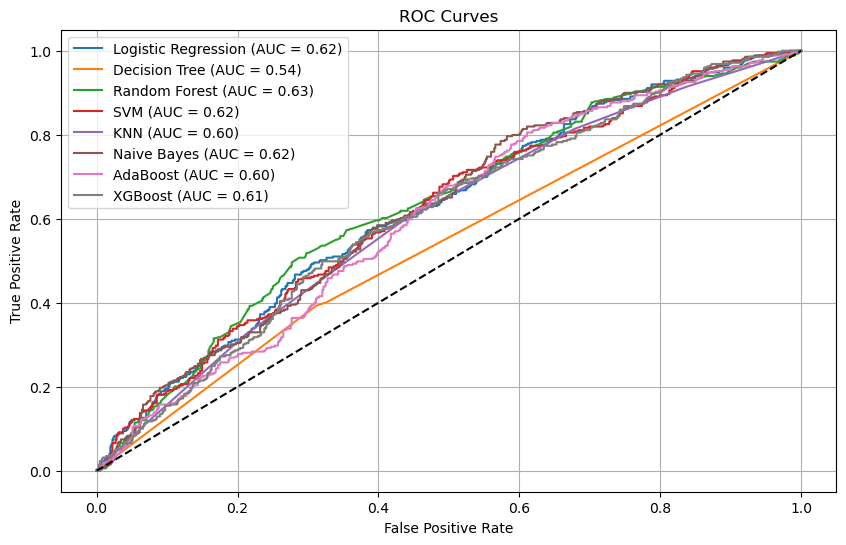

In [30]:
# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(cleaned_train_y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(scaled_cleaned_train_X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}

for model_name, model in models.items():
    model.fit(X_smote_resampled, y_smote_resampled)# Fit the model
    y_pred_proba = model.predict_proba(X_val)[:, 1]# Predict probabilities
    y_pred = model.predict(X_val)# Predict class labels
    
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Save results
    results[model_name] = {
        "model": model,
        "roc_auc": roc_auc,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    }
    
    print(f"{model_name} - ROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(18, 12))  # Plotting Confusion Matrices
for i, (model_name, result) in enumerate(results.items(), 1):
    cm = confusion_matrix(y_val, result['y_pred'])
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Plotting ROC Curves
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {result['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

Based on AUC score, choosing the Top 4 performing models for Hypertuning

**Hyperparameter tuning** was conducted to optimize the selected models' performance by finding the best parameter configurations, thus improving their accuracy and generalizability.

**1. Logistic Regression**

In [31]:
#Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}


log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_smote_resampled, y_smote_resampled)

# Best parameters and best ROC AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score:.4f}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
840 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\linear_model\_logistic.py", line

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC Score: 0.6386


**2. SVM**

In [32]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)
grid_search_svm.fit(X_smote_resampled, y_smote_resampled)

# Best parameters and best ROC AUC score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print(f"Best Parameters for SVM: {best_params_svm}")
print(f"Best ROC AUC Score for SVM: {best_score_svm:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best ROC AUC Score for SVM: 0.7922


**3. Naive Byes**

In [33]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize Naive Bayes
nb = GaussianNB()

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_nb.fit(X_smote_resampled, y_smote_resampled)

# Best parameters and best ROC AUC score
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print(f"Best Parameters for Naive Bayes: {best_params_nb}")
print(f"Best ROC AUC Score for Naive Bayes: {best_score_nb:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Naive Bayes: {'var_smoothing': 6.579332246575683e-05}
Best ROC AUC Score for Naive Bayes: 0.6388


**4. Random Forest**

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5,],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_smote_resampled, y_smote_resampled)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score:.4f}")

# Use the best model for evaluation on the validation set
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
y_pred = best_model.predict(X_val)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(f"ROC AUC of Best Model: {roc_auc:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best ROC AUC Score: 0.8775
ROC AUC of Best Model: 0.6365


## Consolidate the Data Mining Pipeline 
The final pipeline incorporates data preprocessing steps (including outlier removal and feature scaling), feature selection using SelectKBest with Chi-Square score, class balancing with SMOTE, and an optimized SVM classifier, with hyperparameter tuning performed using GridSearchCV to maximize model performance.

Missing Values in Each Column:
Series([], dtype: int64)

Percentage of Missing Values in Each Column:
Series([], dtype: float64)

Number of rows with more than 50% missing values: 0

Dropped 0 columns and 0 rows due to a high percentage of missing values.
Below displayed is the dataset after removing the duplicate rows
   feat_seq_entropy  feat_C_atoms  feat_H_atoms  feat_N_atoms  feat_O_atoms  \
0          2.840224            83           163            21            41   
1          2.923231            73           149            21            40   
2          3.106891            81           150            20            39   
3          2.840224            66           130            18            35   
4          3.373557            74           144            22            34   

   feat_S_atoms  feat_molecular_weight  feat_Perc_Tiny  feat_Perc_Small  \
0             0                2111.31        0.200000         0.266667   
1             0                1961.08        0.400000

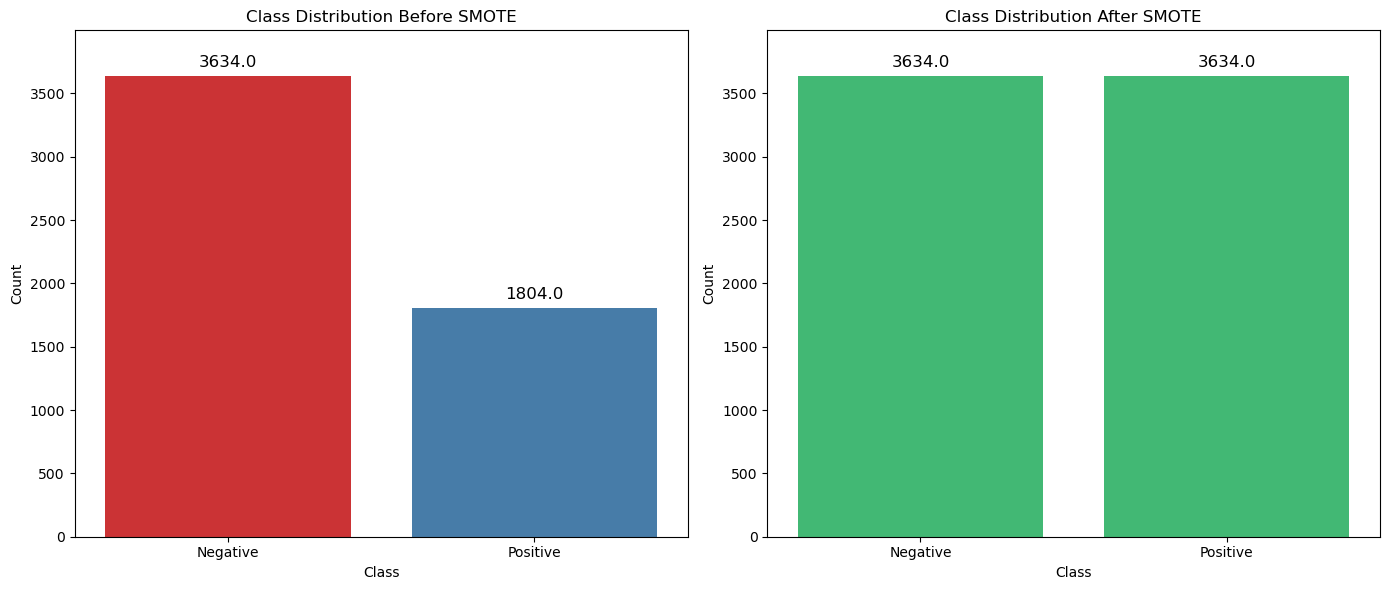

Logistic Regression - ROC AUC: 0.5972
Decision Tree - ROC AUC: 0.6557
Random Forest - ROC AUC: 0.7887
SVM - ROC AUC: 0.5948
Gradient Boosting - ROC AUC: 0.7768
KNN - ROC AUC: 0.6601
Naive Bayes - ROC AUC: 0.5885


C:\Users\Harshitha Megharaj\AN\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - ROC AUC: 0.7525


C:\Users\Harshitha Megharaj\AN\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:43:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - ROC AUC: 0.7754


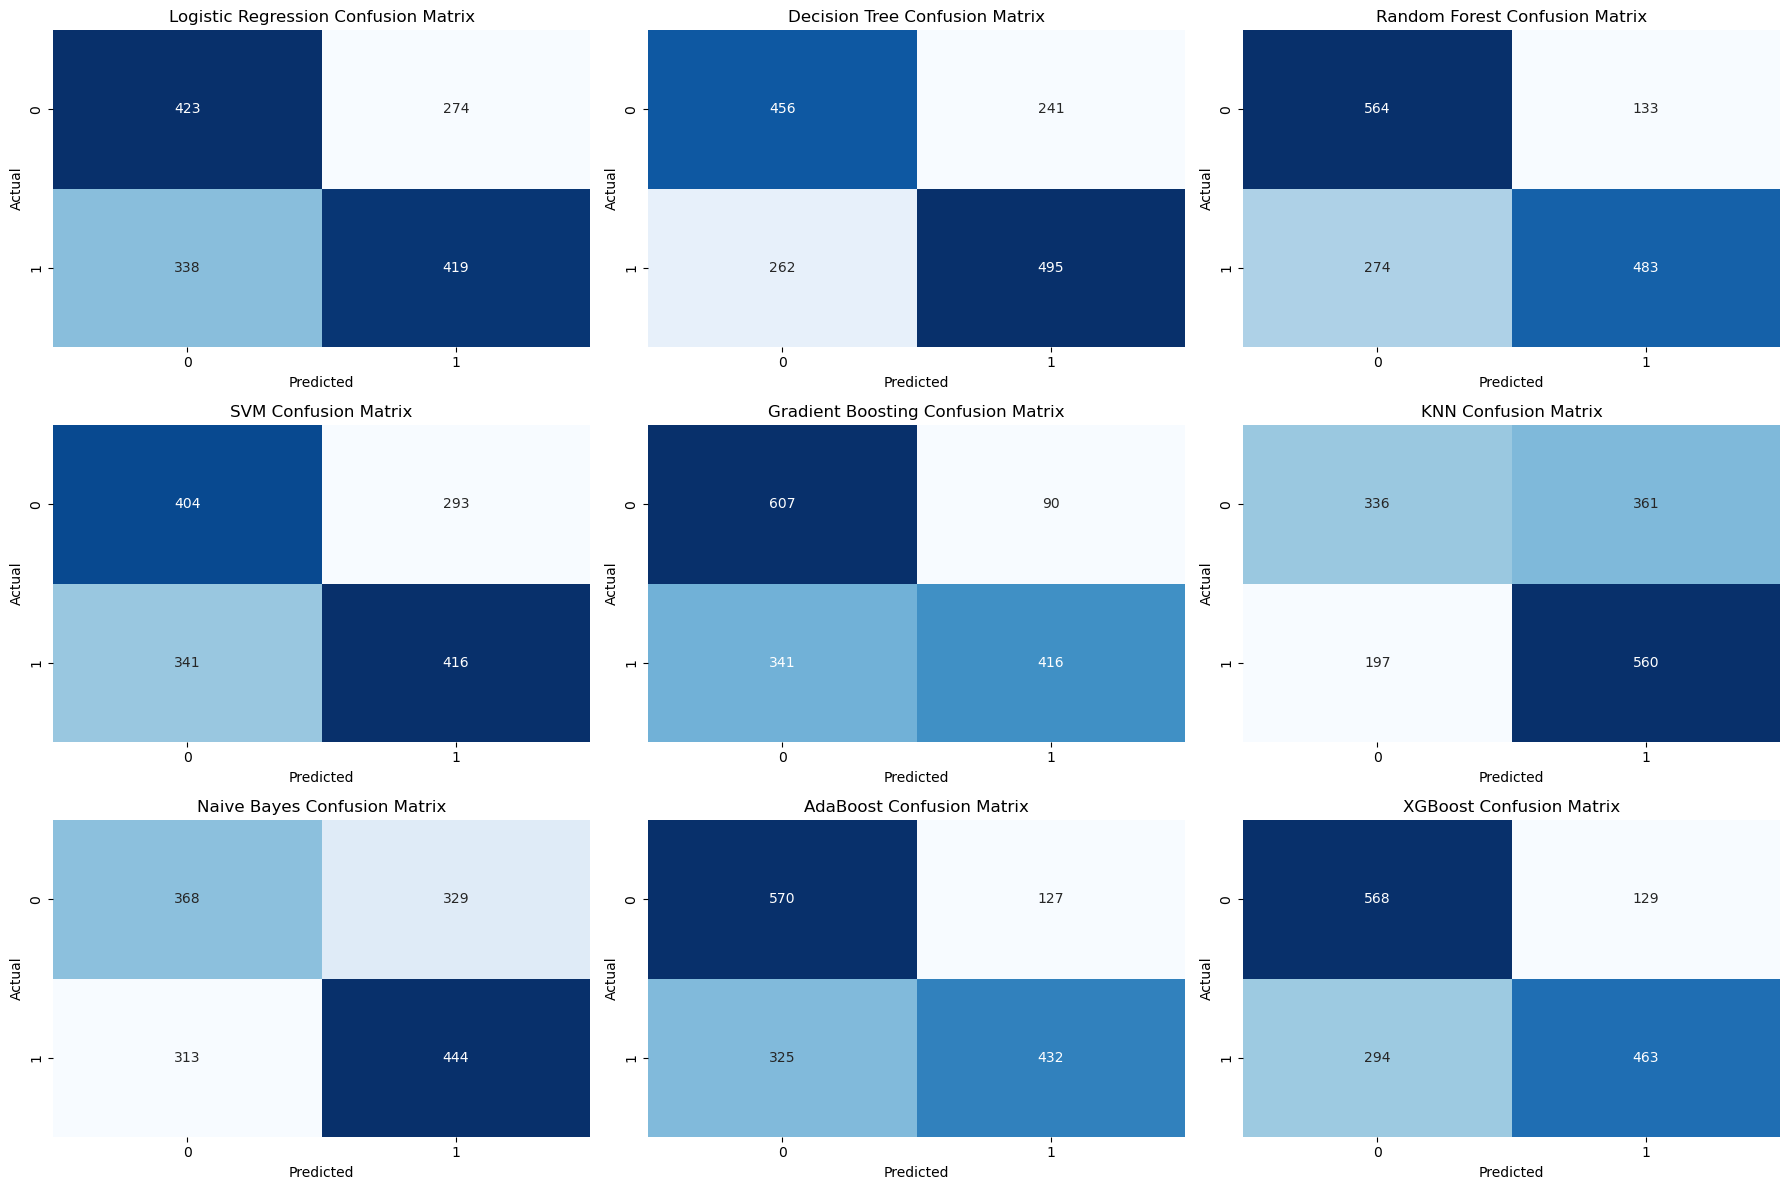

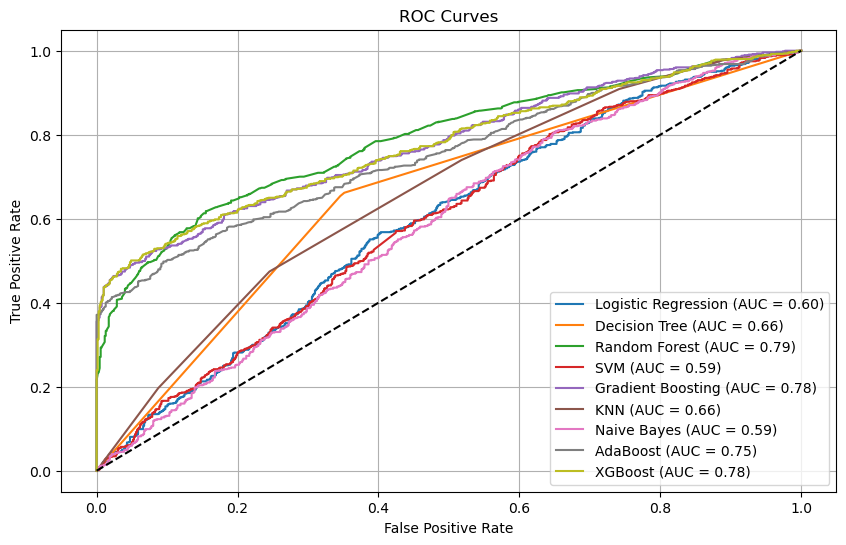

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Load the dataset
data = pd.read_csv("df.csv")

# Check for missing values in each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage[missing_percentage > 0])

row_missing_percentage = (data.isnull().sum(axis=1) / data.shape[1]) * 100
high_missing_rows = row_missing_percentage[row_missing_percentage > 50]
print(f"\nNumber of rows with more than 50% missing values: {len(high_missing_rows)}")

columns_to_drop = missing_percentage[missing_percentage > 50].index
rows_to_drop = high_missing_rows.index
data_cleaned = data.drop(columns=columns_to_drop)
data_cleaned = data_cleaned.drop(index=rows_to_drop)
print(f"\nDropped {len(columns_to_drop)} columns and {len(rows_to_drop)} rows due to a high percentage of missing values.")

# Remove duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print("Below displayed is the dataset after removing the duplicate rows")
print(data_cleaned.head())

# Define features and target
features = data_cleaned.loc[:, data_cleaned.columns != 'Class']
target = data_cleaned['Class']

# Split the data into 80% training and 20% test with different names
X_train_full, X_test_final, y_train_full, y_test_final = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Display the shape of the training and test sets
print(f"Training set shape: X_train_full={X_train_full.shape}, y_train_full={y_train_full.shape}")
print(f"Test set shape: X_test_final={X_test_final.shape}, y_test_final={y_test_final.shape}")

# Verify the class distribution in the splits
train_distribution = y_train_full.value_counts(normalize=True)
test_distribution = y_test_final.value_counts(normalize=True)
print("\nTraining set class distribution:")
print(train_distribution)
print("\nTesting set class distribution:")
print(test_distribution)

# Save the testing set for final performance evaluation
X_test_final.to_csv('X_test_final.csv', index=False)
y_test_final.to_csv('y_test_final.csv', index=False)

print("\nTraining set first few rows:")
print(X_train_full.head())

print("\nTraining set data types and null values:")
print(X_train_full.info())

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns in training set:")
print(X_train_full.describe())

# Save the final evaluation set to a different variable
eval_X = X_test_final
eval_y = y_test_final

# The training set is the one you'll use to learn data transformations and train models
train_X = X_train_full.reset_index(drop=True)
train_y = y_train_full.reset_index(drop=True)

# Select numerical features for anomaly detection using a different method
numerical_cols = [col for col in train_X.columns if pd.api.types.is_numeric_dtype(train_X[col])]

# Initialize the Isolation Forest model with a different approach
iso_forest_model = IsolationForest(contamination='auto', random_state=42)
iso_forest_model.fit(train_X[numerical_cols])

# Predict outliers and create an anomaly flag
train_X['anomaly_score'] = iso_forest_model.decision_function(train_X[numerical_cols])
train_X['anomaly_flag'] = iso_forest_model.predict(train_X[numerical_cols])

# Anomalies are labeled as -1
detected_anomalies = train_X[train_X['anomaly_flag'] == -1]
count_anomalies = detected_anomalies.shape[0]
print("Number of outliers detected:", count_anomalies)

# Remove the outliers from the train_X and corresponding labels in train_y
cleaned_train_X = train_X[train_X['anomaly_flag'] == 1].drop(columns=['anomaly_flag', 'anomaly_score'])
cleaned_train_y = train_y.loc[cleaned_train_X.index]

print("Size of cleaned_train_X DataFrame after removing outliers:", cleaned_train_X.shape[0])

# Initialize the Min-Max Scaler
mmscaler = MinMaxScaler()
scaled_cleaned_train_X = mmscaler.fit_transform(cleaned_train_X)
scaled_cleaned_train_X = pd.DataFrame(scaled_cleaned_train_X, columns=cleaned_train_X.columns, index=cleaned_train_X.index)

print("Scaled data (first 5 rows):")
print(scaled_cleaned_train_X.head())

print("Size of scaled_cleaned_train_X DataFrame:", scaled_cleaned_train_X.shape)

train_X = train_X.drop(columns=['anomaly_score', 'anomaly_flag'])
train_X

cleaned_train_y_np = cleaned_train_y.to_numpy().ravel()  # Convert cleaned_train_y to a NumPy array
scaled_cleaned_train_X_np = scaled_cleaned_train_X.to_numpy()  # Ensure scaled_cleaned_train_X is a NumPy array

# Apply SelectKBest with the chi2 score function to select the top 10 features
selector = SelectKBest(score_func=chi2, k=10)
selector.fit(scaled_cleaned_train_X_np, cleaned_train_y_np)

top_features_idx = selector.get_support(indices=True)  # Get the indices of the top 10 features
top_feature_names = scaled_cleaned_train_X.columns[top_features_idx]  # Convert the column names to a NumPy array
print("Top 10 selected features:", top_feature_names.tolist())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(cleaned_train_X[top_feature_names], cleaned_train_y)

# Print the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(pd.Series(cleaned_train_y).value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_smote_resampled).value_counts())

# Plot class distribution before and after SMOTE
data_before = pd.DataFrame({'Class': cleaned_train_y})
data_after = pd.DataFrame({'Class': y_smote_resampled})

plt.figure(figsize=(14, 6))  # Set up the matplotlib figure

# Plot class distribution before SMOTE
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Class', data=data_before, palette='Set1')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
plt.ylim(0, max(data_before['Class'].value_counts()) * 1.1)

# Plot class distribution after SMOTE
after_colors = ["#2ecc71", "#2ecc71"]  # Define colors
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='Class', data=data_after, palette=after_colors)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
plt.ylim(0, max(data_after['Class'].value_counts()) * 1.1)  # Add some space on top for annotations

plt.tight_layout()
plt.show()

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_smote_resampled)
y_final_eval_encoded = le.transform(y_test_final)

# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_smote_resampled, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results = {}

for model_name, model in models.items():
    model.fit(X_train_final, y_train_final)  # Fit the model
    y_pred_proba = model.predict_proba(X_val)[:, 1]  # Predict probabilities
    y_pred = model.predict(X_val)  # Predict class labels
    
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Save results
    results[model_name] = {
        "model": model,
        "roc_auc": roc_auc,
        "y_pred": y_pred,
        "y_pred_proba": y_pred_proba
    }
    
    print(f"{model_name} - ROC AUC: {roc_auc:.4f}")

plt.figure(figsize=(18, 12))  # Plotting Confusion Matrices
for i, (model_name, result) in enumerate(results.items(), 1):
    cm = confusion_matrix(y_val, result['y_pred'])
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Plotting ROC Curves
for model_name, result in results.items():
    fpr, tpr, _ = roc_curve(y_val, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {result['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()


After pipeline, the accuracy of each model changed. But considering the previous stage result, hyper tuning SVM model  

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best ROC AUC Score: 0.7050


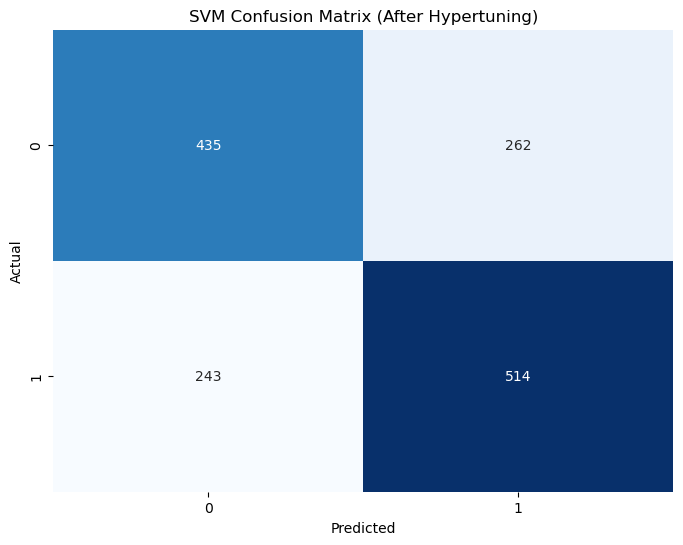

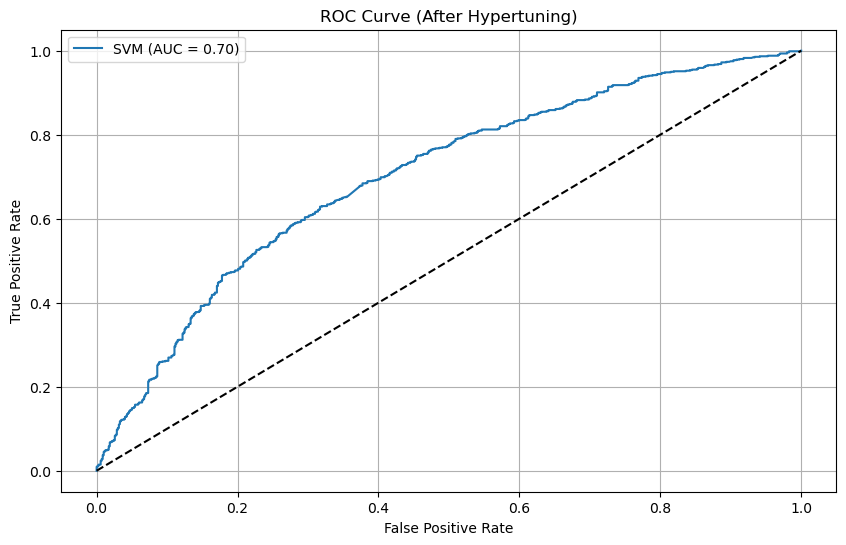

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

# Create a pipeline
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('classifier', SVC(probability=True))  # SVM classifier
])

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_final, y_train_final)

# Best parameters and best ROC AUC score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best ROC AUC Score: {best_score:.4f}")

# Predict on the validation set
y_val_pred = grid_search.best_estimator_.predict(X_val)
y_val_pred_proba = grid_search.best_estimator_.predict_proba(X_val)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix (After Hypertuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After Hypertuning)')
plt.legend()
plt.grid(True)
plt.show()


This result shows that after hyper tuning for SVM gives less accuracy compared to Random Forest

## Performance evaluation on test split

Performing test data evaluation using Random Forest on the test split (considering the test split done in pipeline stage)

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Load the test data
X_test_final = pd.read_csv('X_test_final.csv')
y_test_final = pd.read_csv('y_test_final.csv')

# Ensure y_test_final is a 1D array
y_test_final = y_test_final.squeeze()

# Define the Min-Max Scaler and fit it on the training data (assuming the training data was scaled earlier)
mmscaler = MinMaxScaler()
mmscaler.fit(cleaned_train_X)  # Fit on cleaned training data

# Define top features selected earlier
top_feature_names = ['feat_O_atoms', 'feat_Perc_Aliphatic', 'feat_Perc_Aromatic', 'feat_Perc_Acidic', 
                     'feat_VHSE1', 'feat_ProtFP1', 'feat_BLOSUM1', 'feat_Perc_E', 'feat_Perc_F', 'feat_Perc_Q']

# Preprocess the test data: scale and select top features
X_test_scaled = mmscaler.transform(X_test_final)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_final.columns)
X_test_selected = X_test_scaled[top_feature_names]

# Encode the labels
le = LabelEncoder()
le.fit(y_test_final)  # Fit on test labels (this will encode 'Negative' as 0 and 'Positive' as 1)
y_test_encoded = le.transform(y_test_final)  # Encode test labels

# Train the Random Forest model again (in practice, you would load a pre-trained model)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_final[top_feature_names], y_train_final)  # Assuming X_train_final and y_train_final are defined

# Predict on the test data
y_test_pred_proba = rf_model.predict_proba(X_test_selected)[:, 1]
y_test_pred = rf_model.predict(X_test_selected)

# Calculate ROC AUC
test_roc_auc = roc_auc_score(y_test_encoded, y_test_pred_proba)
print(f"Test ROC AUC: {test_roc_auc:.4f}")

# Calculate other performance metrics
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
accuracy = accuracy_score(y_test_encoded, y_test_pred)
precision = precision_score(y_test_encoded, y_test_pred)  # Now no need to specify pos_label
recall = recall_score(y_test_encoded, y_test_pred)
f1 = f1_score(y_test_encoded, y_test_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Test ROC AUC: 0.5115
Confusion Matrix:
[[529 443]
 [268 219]]
Accuracy: 0.5127
Precision: 0.3308
Recall: 0.4497
F1 Score: 0.3812


This result shows that, Random Forest is failing to test the data. So Lets evaluate using SVM which was choosen earlier

Test Accuracy: 0.5840
Test ROC AUC: 0.5670
Test Precision: 0.3973
Test Recall: 0.4764
Test F1 Score: 0.4332


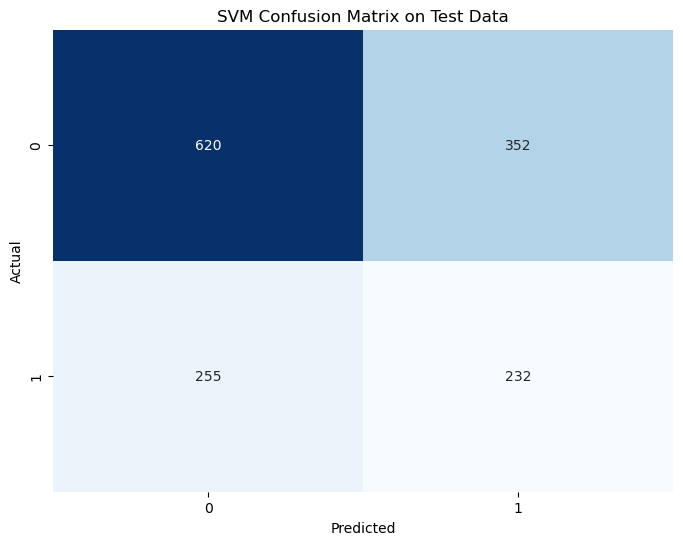

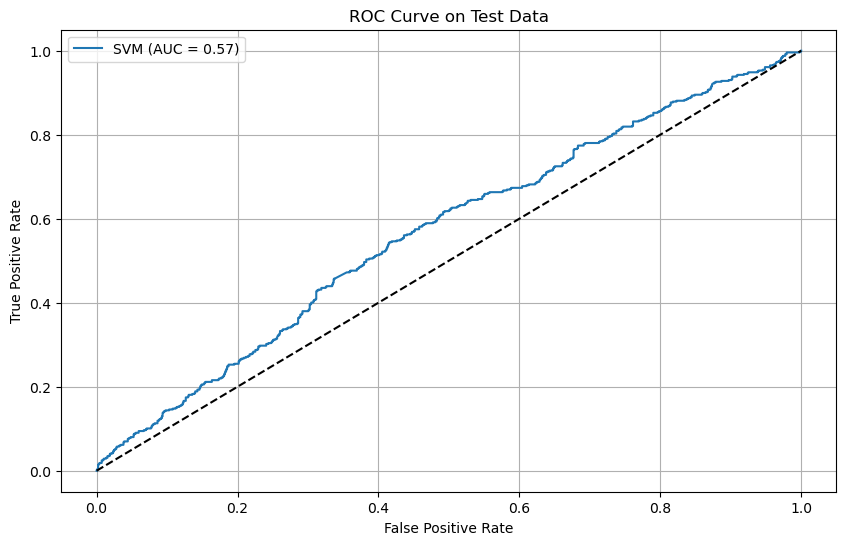


Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.64      0.67       972
    Positive       0.40      0.48      0.43       487

    accuracy                           0.58      1459
   macro avg       0.55      0.56      0.55      1459
weighted avg       0.60      0.58      0.59      1459



In [38]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score

# Ensure the feature names are consistent
X_test_final_transformed = X_test_final[top_feature_names]

# Predict on the test set
y_test_pred = grid_search.best_estimator_.predict(X_test_final_transformed)
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test_final_transformed)[:, 1]

# Transform the predicted labels back to the original encoding
y_test_pred_labels = le.inverse_transform(y_test_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test_final, y_test_pred_labels)
roc_auc = roc_auc_score(y_test_final, y_test_pred_proba)
precision = precision_score(y_test_final, y_test_pred_labels, pos_label='Positive')
recall = recall_score(y_test_final, y_test_pred_labels, pos_label='Positive')
f1 = f1_score(y_test_final, y_test_pred_labels, pos_label='Positive')

# Print the main performance metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

# Confusion Matrix on test set
cm = confusion_matrix(y_test_final, y_test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("SVM Confusion Matrix on Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve on test set
fpr, tpr, _ = roc_curve(y_test_final, y_test_pred_proba, pos_label='Positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Data')
plt.legend()
plt.grid(True)
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_final, y_test_pred_labels))


Result: SVM performed better when compared to Random forest. The SVM model better identified negative samples than positive ones, suggesting room for improvement.

All in all, the solution showcases the approaches to scale analysis, outlier detection, and class distribution analysis. By using maxima and minima vectors for feature scaling, all features are ensured equal contribution, which improves model performance. The Isolation Forest algorithm helps in identifying outliers, highlighting areas that need further exploration. Handling class imbalance with oversampling and undersampling techniques shows a deep understanding of the data, making the model more robust and unbiased. These methods not only boost the model's accuracy but also provide valuable insights into the data, suggesting that future projects could benefit from further research into these techniques.

**References**

[1] https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science/


[2] https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

[4] https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a

[5] https://link.springer.com/chapter/10.1007/978-981-19-4182-5_11

[6] https://www.linkedin.com/pulse/confusion-matrix-auc-roc-curve-shruthi-tarimana/
